<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/04_Prove_Assignment_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving crx.data to crx.data


In [2]:
credit = pd.read_csv("crx.data", header = None, na_values = ["?"], skipinitialspace= True)
# set column name from A1 to A16
credit.columns = ["A" + str(i) for i in range(1,17)]
credit

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [3]:
credit.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [4]:
credit.isna().sum(axis = 0)

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

# Numeric Value: Mean imputation
# Distere Value: Most Frequent imputation
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_discrete = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

credit[["A2", "A14"]] = imp_numeric.fit_transform(credit[["A2", "A14"]])
credit[["A1", "A4", "A5", "A6", "A7"]] = imp_discrete.fit_transform(credit[["A1", "A4", "A5", "A6", "A7"]])

credit.isna().sum(axis = 0)

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X = credit.drop(columns = "A16", axis = 1)
y = credit["A16"].map({"+":0, "-":1})

# One-Hot-Encoding
X = pd.get_dummies(X, columns = X.select_dtypes("object").columns)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree_classfier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
score = cross_val_score(tree_classfier, X = X, y = y, cv = 5)

score

array([0.68115942, 0.83333333, 0.86956522, 0.76811594, 0.86231884])

In [8]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.80 (+/- 0.14)


In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

predicted_y_cv = cross_val_predict(tree_classfier, X, y, cv=5)

accuracy_score(y, predicted_y_cv)

0.8028985507246377

In [12]:
tree_classfier.fit(X_train, y_train)
predicted_y = tree_classfier.predict(X_test)

accuracy_score(y_test, predicted_y)


0.7777777777777778

[Text(151.37234042553192, 209.6742857142857, 'X[38] <= 0.5\nentropy = 0.993\nsamples = 483\nvalue = [217, 266]'),
 Text(72.12446808510639, 194.14285714285714, 'X[1] <= 0.395\nentropy = 0.368\nsamples = 227\nvalue = [16, 211]'),
 Text(42.740425531914894, 178.61142857142858, 'X[44] <= 0.5\nentropy = 0.896\nsamples = 32\nvalue = [10, 22]'),
 Text(35.61702127659574, 163.07999999999998, 'X[4] <= 480.0\nentropy = 0.75\nsamples = 28\nvalue = [6, 22]'),
 Text(28.493617021276595, 147.54857142857142, 'X[16] <= 0.5\nentropy = 0.619\nsamples = 26\nvalue = [4, 22]'),
 Text(14.246808510638298, 132.01714285714286, 'X[0] <= 16.21\nentropy = 0.426\nsamples = 23\nvalue = [2, 21]'),
 Text(7.123404255319149, 116.48571428571428, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(21.370212765957447, 116.48571428571428, 'X[33] <= 0.5\nentropy = 0.267\nsamples = 22\nvalue = [1, 21]'),
 Text(14.246808510638298, 100.9542857142857, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(28.493617021276595, 100.

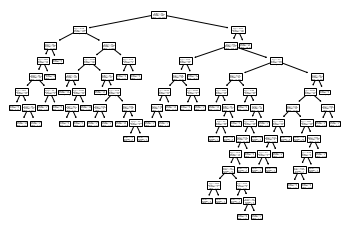

In [14]:
from sklearn import tree

tree.plot_tree(tree_classfier)